In [3]:

"""Importing the libraries"""
import numpy as np
import pandas as pd 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler




In [4]:
def mean_euclidean_error(y_true, y_pred):
    
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [5]:
"""Importing the dataset"""

train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')
test_cup = pd.read_csv('../data/ML-CUP20-TS.csv')

In [6]:
train_x = train_df.iloc[:, :-2].to_numpy()
train_y = train_df.iloc[:, [10, 11]].to_numpy()

In [47]:
scaler_x = MinMaxScaler()
scaler_x.fit(train_x)

scaler_y = MinMaxScaler()
scaler_y.fit(train_y)

norm_train_x = scaler_x.transform(train_x)
norm_train_y = scaler_y.transform(train_y)

In [48]:
norm_train_x ,norm_train_y

(array([[0.22473908, 0.60610967, 0.5131348 , ..., 0.88457168, 0.8088574 ,
         0.19611414],
        [0.24442529, 0.53536982, 0.86584581, ..., 0.56708566, 0.75505508,
         0.30492445],
        [0.28981654, 0.70778389, 0.64202995, ..., 0.57332891, 0.63638336,
         0.19916158],
        ...,
        [0.2924122 , 0.47858665, 0.63604972, ..., 0.54842834, 0.74778667,
         0.20844376],
        [0.25535857, 0.83820603, 0.51118942, ..., 0.84945468, 0.71557177,
         0.31895698],
        [0.35781127, 0.71709748, 0.63655214, ..., 0.69314953, 0.48247551,
         0.26915339]]),
 array([[0.61746919, 0.13190596],
        [0.93329264, 0.38768037],
        [0.80469691, 0.27203047],
        ...,
        [0.88741561, 0.34815574],
        [0.69954139, 0.18419933],
        [0.6463715 , 0.14715681]]))

In [58]:
"""Splitting the dataset into the Training set and Test set"""

(x_train, x_test, y_train, y_test_norm) = train_test_split(norm_train_x, norm_train_y,
        test_size=0.3, random_state=30)

In [59]:
y_test_norm.shape

(458, 2)

In [1]:
import time

start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.00038361549377441406


In [2]:
""" Fitting KNN to the Training set with the best parameters obtained form gridsearch"""
start = time.time()
knn_model = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                     with_std=True)), ('estimator',
                     RegressorChain(KNeighborsRegressor(algorithm='auto',
                                                                   leaf_size=1,
                                                                   metric='minkowski',
                                                                   metric_params=None,
                                                                   n_jobs=None,
                                                                   n_neighbors=10,
                                                                   p=2,
                                                                   weights='distance'),
                     order=[0, 1]))]).fit(x_train, y_train)
end = time.time()
print(end - start)

NameError: name 'Pipeline' is not defined

In [60]:
""" Predicting the Test set results """

y_pred_norm = knn_model.predict(x_test)


In [61]:
y_pred = scaler_y.inverse_transform(y_pred_norm)
y_test = scaler_y.inverse_transform(y_test_norm)

In [64]:
y_test_norm 

(array([[1.81582260e-02, 9.71182477e-01],
        [9.41367774e-01, 4.02940403e-01],
        [5.99873866e-01, 1.22778559e-01],
        [5.06676160e-02, 9.29713197e-01],
        [3.37058579e-02, 9.32524431e-01],
        [1.73099508e-01, 4.84585289e-01],
        [4.45075646e-01, 2.62040132e-02],
        [2.11288370e-01, 3.99081606e-01],
        [5.19872647e-01, 7.01611682e-02],
        [9.49494327e-01, 4.09016573e-01],
        [5.99288412e-01, 1.17866433e-01],
        [5.13242611e-02, 9.22138725e-01],
        [1.28452769e-01, 5.93405376e-01],
        [1.00833757e-01, 7.34590038e-01],
        [5.57563761e-01, 9.28422302e-02],
        [3.87486875e-01, 3.71075483e-03],
        [5.11092135e-02, 9.15484144e-01],
        [7.89416233e-01, 2.71594624e-01],
        [9.65614568e-01, 4.17402312e-01],
        [4.52927293e-01, 3.28090441e-02],
        [7.54600366e-01, 2.28389239e-01],
        [5.47906354e-01, 8.34671027e-02],
        [3.90201445e-01, 2.55160525e-03],
        [1.27788954e-01, 5.8352972

In [65]:
y_test

array([[1.81582260e-02, 9.71182477e-01],
       [9.41367774e-01, 4.02940403e-01],
       [5.99873866e-01, 1.22778559e-01],
       [5.06676160e-02, 9.29713197e-01],
       [3.37058579e-02, 9.32524431e-01],
       [1.73099508e-01, 4.84585289e-01],
       [4.45075646e-01, 2.62040132e-02],
       [2.11288370e-01, 3.99081606e-01],
       [5.19872647e-01, 7.01611682e-02],
       [9.49494327e-01, 4.09016573e-01],
       [5.99288412e-01, 1.17866433e-01],
       [5.13242611e-02, 9.22138725e-01],
       [1.28452769e-01, 5.93405376e-01],
       [1.00833757e-01, 7.34590038e-01],
       [5.57563761e-01, 9.28422302e-02],
       [3.87486875e-01, 3.71075483e-03],
       [5.11092135e-02, 9.15484144e-01],
       [7.89416233e-01, 2.71594624e-01],
       [9.65614568e-01, 4.17402312e-01],
       [4.52927293e-01, 3.28090441e-02],
       [7.54600366e-01, 2.28389239e-01],
       [5.47906354e-01, 8.34671027e-02],
       [3.90201445e-01, 2.55160525e-03],
       [1.27788954e-01, 5.83529722e-01],
       [4.575815

In [56]:
"""  summarize performance """

print(f"Model r2_score :{round(r2_score(y_test, y_pred),3)}" )
print(f"Model MEE :{round(mean_euclidean_error(y_test, y_pred),3)}" )

Model r2_score :0.947
Model MEE :0.066


Text(0, 0.5, 'Residuals')

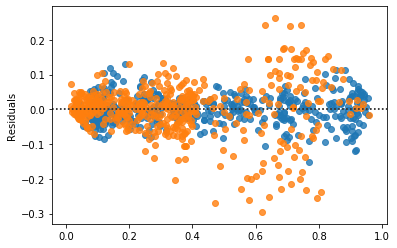

In [140]:
"""Visualising model results """
# we expect to see the result have zero mean distributed evenly around the x-axis 
sns.residplot(y_pred[:, 0], y_test[:, 0])
sns.residplot(y_pred[:, 1], y_test[:, 1]).set_ylabel('Residuals')

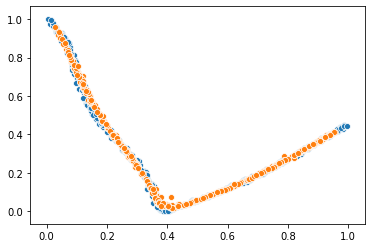

In [159]:
sns.scatterplot(y_test[:, 0], y_test[:, 1])
sns.scatterplot(y_pred[:, 0], y_pred[:, 1])


(472, 10)

In [161]:

scaler = minmax_scale(feature_range=(0, 1),axis=0)_.fit(test_cup)



TypeError: minmax_scale() missing 1 required positional argument: 'X'

In [151]:
"""Feature Scaling """
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
x_cup_test = sc_X.transform(test_cup)
x_cup_test

array([[ 0.91396952, -0.53675961, -0.50917647, ..., -0.89855493,
        -0.5808461 ,  1.69220187],
       [-1.77707653,  1.43605   ,  1.19749609, ...,  0.89906673,
         1.74677784, -1.5639081 ],
       [-1.9353739 ,  0.85151395,  1.81810454, ..., -0.89855493,
         1.04849135, -1.08740487],
       ...,
       [ 1.38886031, -1.48663022, -1.59524194, ..., -1.71565663,
        -1.2791326 ,  0.2626899 ],
       [ 1.07226556, -1.0482285 , -0.97463349, ..., -0.73513552,
        -1.04637089,  1.69220187],
       [ 0.91396952, -1.12129566, -1.12978492, ..., -0.73513552,
        -0.73602057,  1.61278467]])

In [152]:
""" Predicting the cup test set results and dump to csv"""

y_cup = knn_model.predict(test_cup)
# pd.DataFrame(y_cup).to_csv("Smile_ML-CUP20-TS.csv",header=None)
y_cup

array([[0.26155135, 0.30824143],
       [0.77996783, 0.24601697],
       [0.95852466, 0.417214  ],
       [0.10165868, 0.71189812],
       [0.74417822, 0.22454178],
       [0.48441268, 0.05028196],
       [0.51386059, 0.06726393],
       [0.48819154, 0.05097839],
       [0.15435864, 0.55858496],
       [0.90950567, 0.37054616],
       [0.07425433, 0.8160875 ],
       [0.15414889, 0.57644634],
       [0.03006666, 0.95176275],
       [0.38289436, 0.05706103],
       [0.86028596, 0.32709645],
       [0.31654148, 0.19559476],
       [0.68603087, 0.18063937],
       [0.20182739, 0.4301101 ],
       [0.94016337, 0.39903752],
       [0.0854284 , 0.77792188],
       [0.93255843, 0.39133906],
       [0.37828687, 0.02135291],
       [0.23970826, 0.35447567],
       [0.21539284, 0.40934028],
       [0.87422645, 0.33933096],
       [0.64588601, 0.15317437],
       [0.87380009, 0.33853038],
       [0.08588849, 0.76812469],
       [0.88077048, 0.3459975 ],
       [0.10566081, 0.70523235],
       [0.

In [156]:
minmax_scale.inverse_transform(y_cup)

AttributeError: 'function' object has no attribute 'inverse_transform'

In [157]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(test_cup)

NameError: name 'MinMaxScaler' is not defined

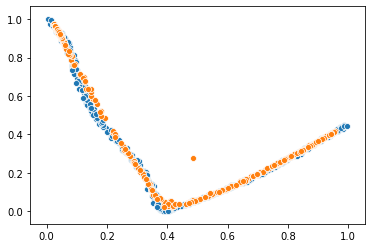

In [129]:
sns.scatterplot(y_test[:, 0], y_test[:, 1])
sns.scatterplot(y_cup[:, 0], y_cup[:, 1])

In [88]:
inversed = sc_X.inverse_transform(y_cup)

ValueError: operands could not be broadcast together with shapes (472,2) (10,) (472,2) 

In [91]:
scaler = minmax_scale(feature_range=(0, 1))
scaler = scaler.fit(train_y)
scaler.inverse_transform(y_cup)

TypeError: minmax_scale() missing 1 required positional argument: 'X'